In [74]:
import pandas as pd

In [76]:
df=pd.read_excel('Data_All.xlsx')

In [77]:
df2 = df.sample(frac=1).reset_index(drop=True)
df2

,T,T/Tmax,T/Tmin,T/Tavg,Class
0,9.91045,0.724679,7.667126e+07,1.780275,0
1,1.92976,0.140433,1.831796e+07,0.346969,1
2,1.08395,0.079067,9.733746e+06,0.194916,2
3,6.06212,0.443279,4.689902e+07,1.088976,0
4,5.16137,0.376489,4.634851e+07,0.928116,2
...,...,...,...,...,...
1495,10.83537,0.788512,1.028531e+08,1.948187,1
1496,9.50568,0.693379,8.535991e+07,1.709308,2
1497,5.03959,0.366741,4.783755e+07,0.906113,1
1498,9.78802,0.712294,9.291130e+07,1.759875,1


In [78]:
x=df2.iloc[ : , 0:4]
x

,T,T/Tmax,T/Tmin,T/Tavg
0,9.91045,0.724679,7.667126e+07,1.780275
1,1.92976,0.140433,1.831796e+07,0.346969
2,1.08395,0.079067,9.733746e+06,0.194916
3,6.06212,0.443279,4.689902e+07,1.088976
4,5.16137,0.376489,4.634851e+07,0.928116
...,...,...,...,...
1495,10.83537,0.788512,1.028531e+08,1.948187
1496,9.50568,0.693379,8.535991e+07,1.709308
1497,5.03959,0.366741,4.783755e+07,0.906113
1498,9.78802,0.712294,9.291130e+07,1.759875


In [79]:
y=df2['Class']
y

0       0
1       1
2       2
3       0
4       2
       ..
1495    1
1496    2
1497    1
1498    1
1499    1
Name: Class, Length: 1500, dtype: int64

In [81]:
x.to_excel('x.xlsx')
y.to_excel('y.xlsx')

In [83]:
x

,T,T/Tmax,T/Tmin,T/Tavg
0,9.91045,0.724679,7.667126e+07,1.780275
1,1.92976,0.140433,1.831796e+07,0.346969
2,1.08395,0.079067,9.733746e+06,0.194916
3,6.06212,0.443279,4.689902e+07,1.088976
4,5.16137,0.376489,4.634851e+07,0.928116
...,...,...,...,...
1495,10.83537,0.788512,1.028531e+08,1.948187
1496,9.50568,0.693379,8.535991e+07,1.709308
1497,5.03959,0.366741,4.783755e+07,0.906113
1498,9.78802,0.712294,9.291130e+07,1.759875


In [82]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x)
reduced_data

array([[ 2.77442924e+07,  1.22336393e+00],
       [-3.06090089e+07, -2.41249310e-01],
       [-3.91932182e+07, -1.22365576e-01],
       ...,
       [-1.08941664e+06, -4.45021401e-01],
       [ 4.39843389e+07, -7.56163009e-01],
       [-2.72466289e+07, -2.64459630e-01]])

In [84]:
df_reduced = pd.DataFrame(reduced_data, columns=['Feature 1', 'Feature 2'])
df_reduced

,Feature 1,Feature 2
0,2.774429e+07,1.223364
1,-3.060901e+07,-0.241249
2,-3.919322e+07,-0.122366
3,-2.027948e+06,0.703740
4,-2.578455e+06,-0.150819
...,...,...
1495,5.392615e+07,-0.824791
1496,3.643295e+07,-0.181135
1497,-1.089417e+06,-0.445021
1498,4.398434e+07,-0.756163


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [86]:
identified_clusters = kmeans.fit_predict(df_reduced)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, ..., 2, 1, 0], dtype=int32)

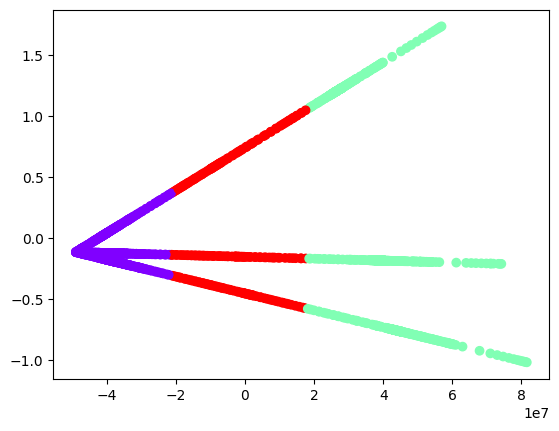

In [87]:
plt.scatter(df_reduced['Feature 1'], df_reduced['Feature 2'], c=identified_clusters, cmap='rainbow')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

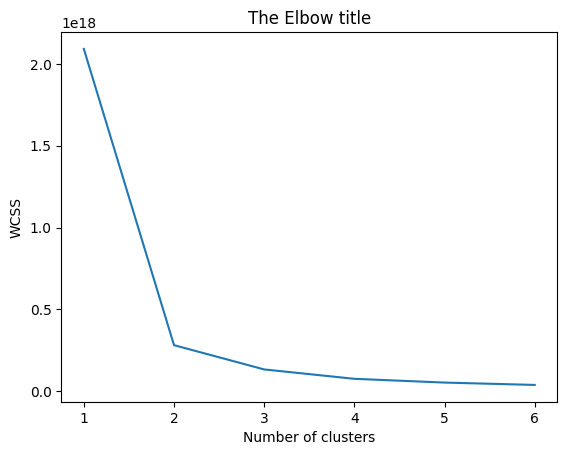

In [89]:
wcss=[]
for i in range(1,7):
   kmeans = KMeans(i)
   kmeans.fit(x)
   wcss_iter = kmeans.inertia_
   wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [91]:
kmeans1 = KMeans(n_clusters=2, random_state=42)
kmeans1.fit(df_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [92]:
identified_clusters1 = kmeans1.fit_predict(df_reduced)
identified_clusters1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

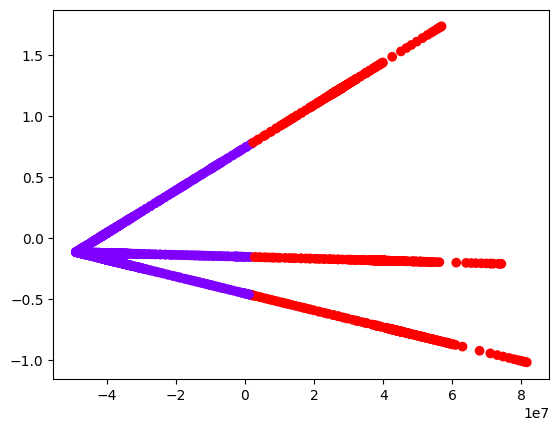

In [93]:
plt.scatter(df_reduced['Feature 1'], df_reduced['Feature 2'], c=identified_clusters1, cmap='rainbow')

In [67]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(df, cluster_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7742076987695192


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
cluster_assignments = kmeans.predict(df)

In [69]:
cluster_assignments

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [70]:
c0 = df[cluster_assignments==0]
c1 = df[cluster_assignments==1]
c2 = df[cluster_assignments==2]
c2

,T,EXP
15,115.782451,109.217549
16,121.249478,103.750522
17,123.485307,101.514693
18,124.737828,100.262172
19,125.579358,99.420642
...,...,...
1495,131.735205,93.264795
1496,131.969731,93.030269
1497,132.222650,92.777350
1498,132.298342,92.701658


In [71]:
c0

,T,EXP
98,175.666515,49.333485
99,178.927536,46.072464
100,181.809999,43.190001
101,184.444500,40.555500
102,186.861347,38.138653
...,...,...
1371,184.487921,40.512079
1372,183.980330,41.019670
1373,181.882785,43.117215
1374,177.666426,47.333574


In [72]:
c1

,T,EXP
0,37.976871,187.023129
1,39.160124,185.839876
2,40.816831,184.183169
3,42.769979,182.230021
4,45.295787,179.704213
...,...,...
1074,100.467568,124.532432
1075,102.228503,122.771497
1076,104.205173,120.794827
1077,106.424017,118.575983


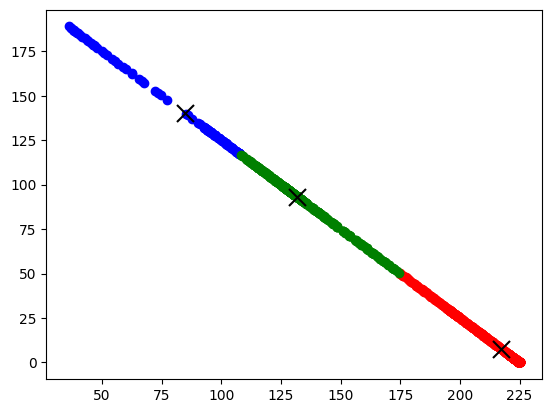

In [73]:
plt.scatter(c0['T'], c0['EXP'], c='red', label='Zero')
plt.scatter(c1['T'], c1['EXP'], c='blue', label='One')
plt.scatter(c2['T'], c2['EXP'], c='green', label='two')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', s=150, label='Centroids')

In [ ]:
cluster_assignments = kmeans.predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

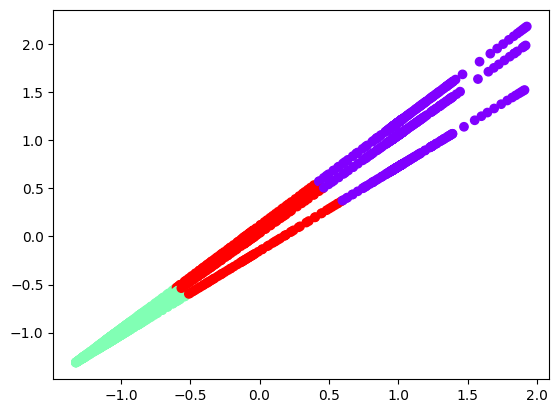

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=cluster_assignments, cmap='rainbow', label='Training Data')